In [52]:
#impots
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

In [53]:
#carregando os dados
df_dsa = pd.read_csv('dataset.csv')

In [54]:
#shape mostrando o tamanho do dataset, total de linhas e colunas
df_dsa.shape

(9700, 11)

In [55]:
#mostrando as 5 primeiras linhas do dataset
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [56]:
#amostra de as ultimas linhas do dataset
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


Analise Exploratoria

In [57]:
#colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [58]:
#verificando os tipos de dados de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [59]:
#resumo estatístico do dataset
df_dsa.describe()

,Valor_Venda
count,9700.000000
mean,230.469892
std,627.504252
min,0.444000
25%,17.248000
50%,54.272000
75%,209.932500
max,22638.480000


In [60]:
#verficando se a duplicidade existe
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [61]:
#verificando se existem valores ausentes
#se haver valores ausentes deve ser resolvido porque e um problema
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [62]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


Pergunta numero 1:
Qual cidade com Maior Valor de Venda de Produtos de Categoria 'Office Supplies'

In [63]:
#primeiro filtramos o df com os registros desejados
df_dsa_p1 = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

In [64]:
#Agrupar os dados por cidade e calcular a soma das vendas
df_dsa_p1_total = df_dsa_p1.groupby('Cidade')['Valor_Venda'].sum()

In [65]:
# Verificar se o dataframe não está vazio antes de usar idxmax
cidade_max_venda = df_dsa_p1_total.idxmax()
print(f'A cidade com maior venda de Office Supplies é: {cidade_max_venda}')

A cidade com maior venda de Office Supplies é: New York City


Pergunta Numero 2 
Qual total de vendas por data do pedido?

In [66]:
#calculando o total de vendas por cada pedido
df_dsa_p2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

In [67]:
df_dsa_p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

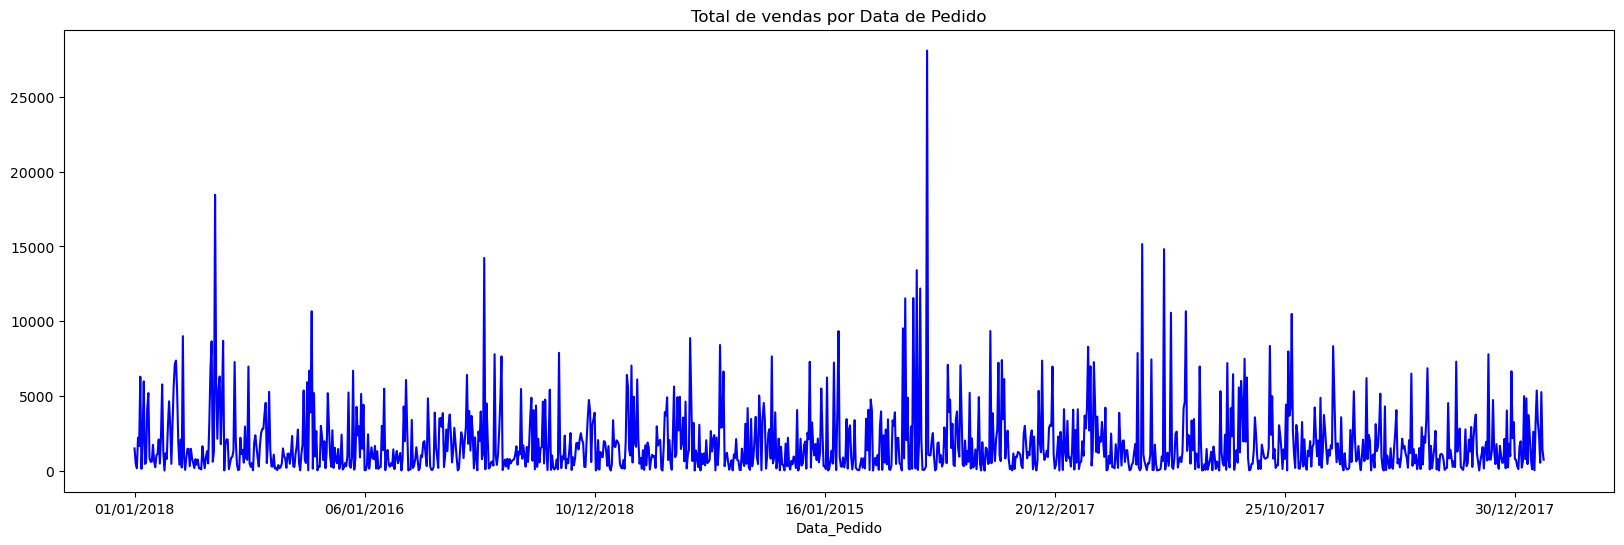

In [68]:
#Plot ou figura, essa alernativa nao e temporarl
#se pergunta fosse ao logo do tempo o script seria outro,convertendo a data para datetime
plt.figure(figsize=(20, 6))
df_dsa_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'blue')
plt.title('Total de vendas por Data de Pedido')
plt.show()

Pergunta de Negocio 3 
Qual o total de vendas por Estado

In [69]:
#Agrupar por estado e calcularmos o total de vendas
df_dsa_p3 = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index() #reset_index()ajuda a criar uma index para nao perder o estado

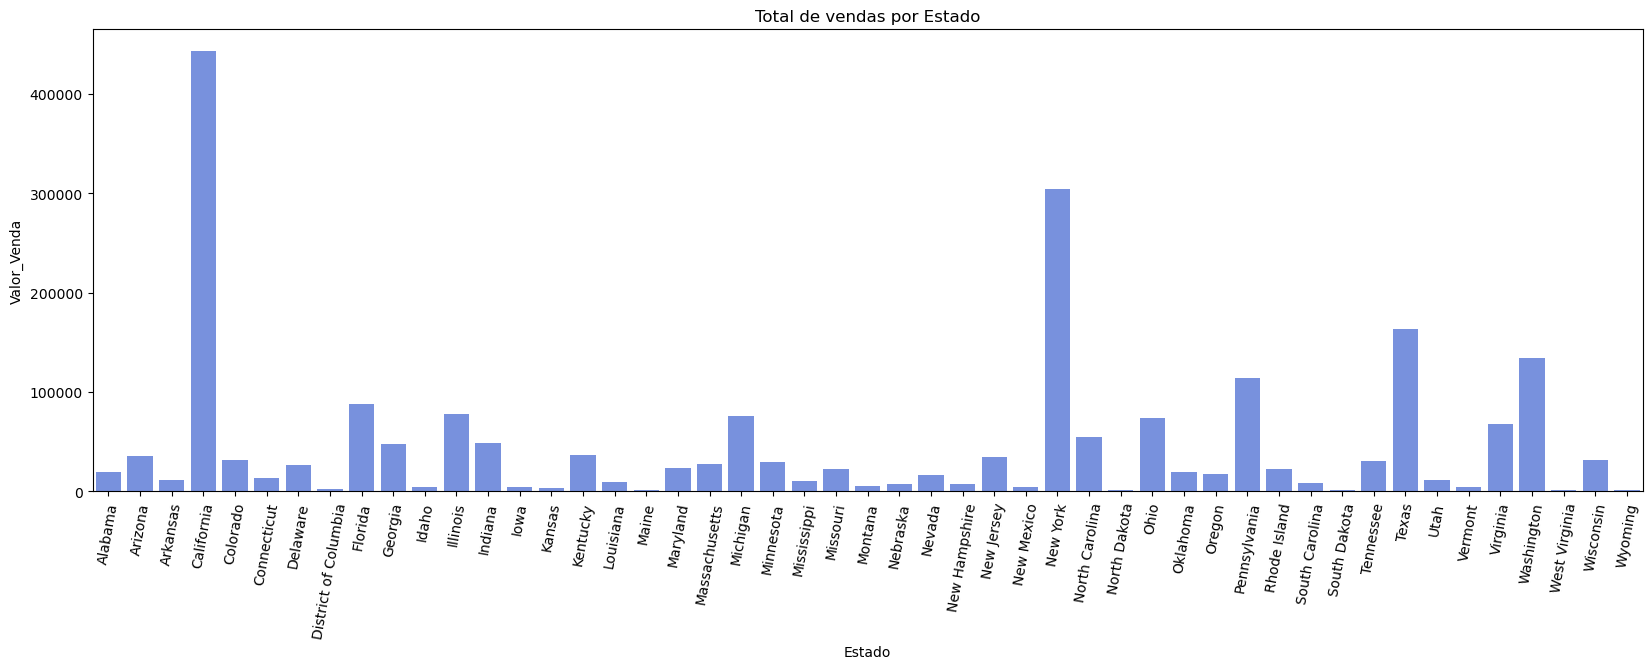

In [70]:
#Plot um grafico mais profissional para relatorios
plt.figure(figsize=(20, 6))
sns.barplot(data = df_dsa_p3,
            y='Valor_Venda',
            x='Estado',).set(title='Total de vendas por Estado')
plt.xticks(rotation= 80) #xticks sao textos do eixo x
plt.show()


Pergunta de Negocio Numero 4
Quais sao as 10 cidades com maior total de vendas?

In [71]:
#Agrupar por cidade, calculamos o total de vendas e ordenamos listando somente as 10 cidades com maior venda
df_dsa_p4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False).head(10)

In [72]:
df_dsa_p4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


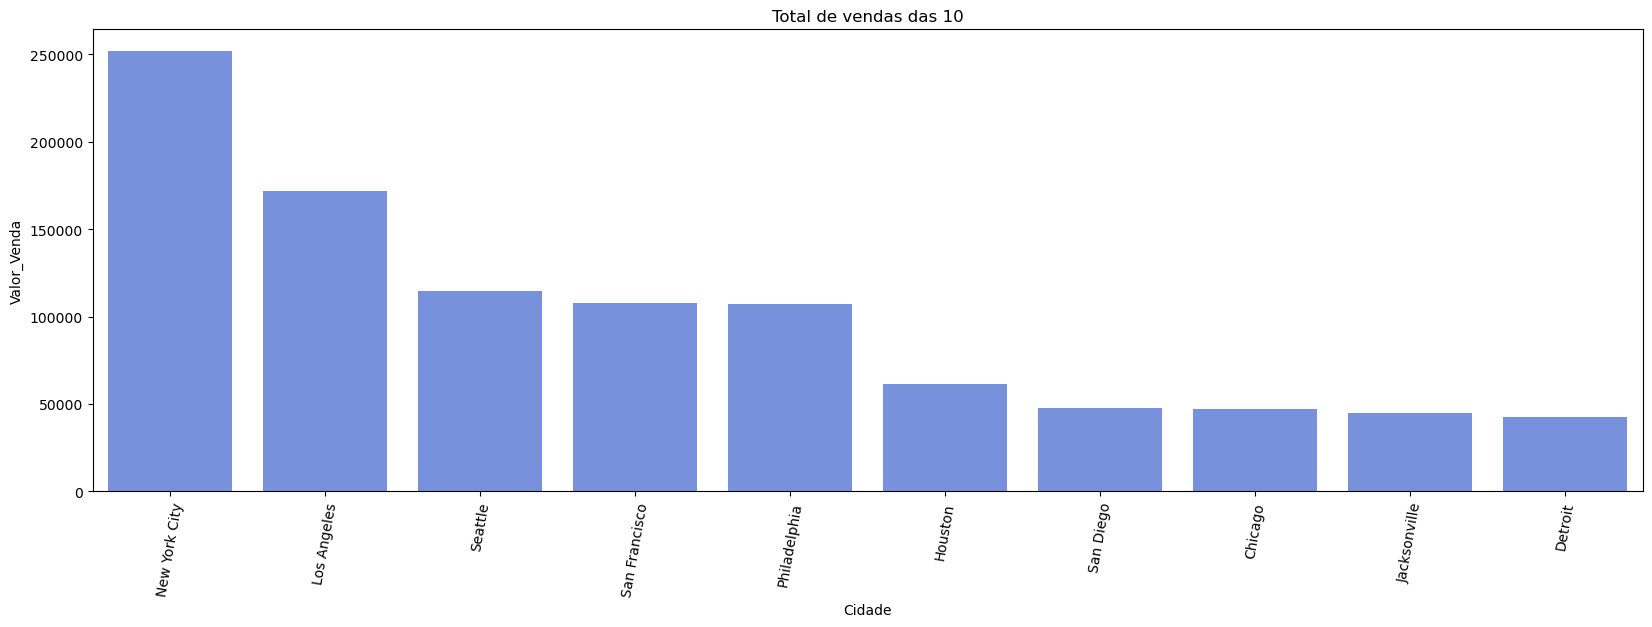

In [73]:
#Plot
plt.figure(figsize=(20, 6))
sns.set_palette('coolwarm') #definindo uma palete de cores
sns.barplot(data = df_dsa_p4,
            y='Valor_Venda',
            x='Cidade').set(title='Total de vendas das 10')
plt.xticks(rotation= 80)
plt.show()

Pergunta Negocio Numero 5
Qual Seguimento teve o MAIOR TOTAL DE VENDAS
Domoste o resultado atraves de um grafico de pizza


In [74]:
#Agrupar por sguimento e calcular o total de vendas
df_dsa_p5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False)

In [75]:
df_dsa_p5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [76]:
#funcao para coverter os dados em valor absoluto
def autopct_format(values):
  def my_format(pct):
    total = sum(values)
    val = int(np.round(pct * total / 100))
    return f'{pct:.1f}%\n({val})'
  return my_format

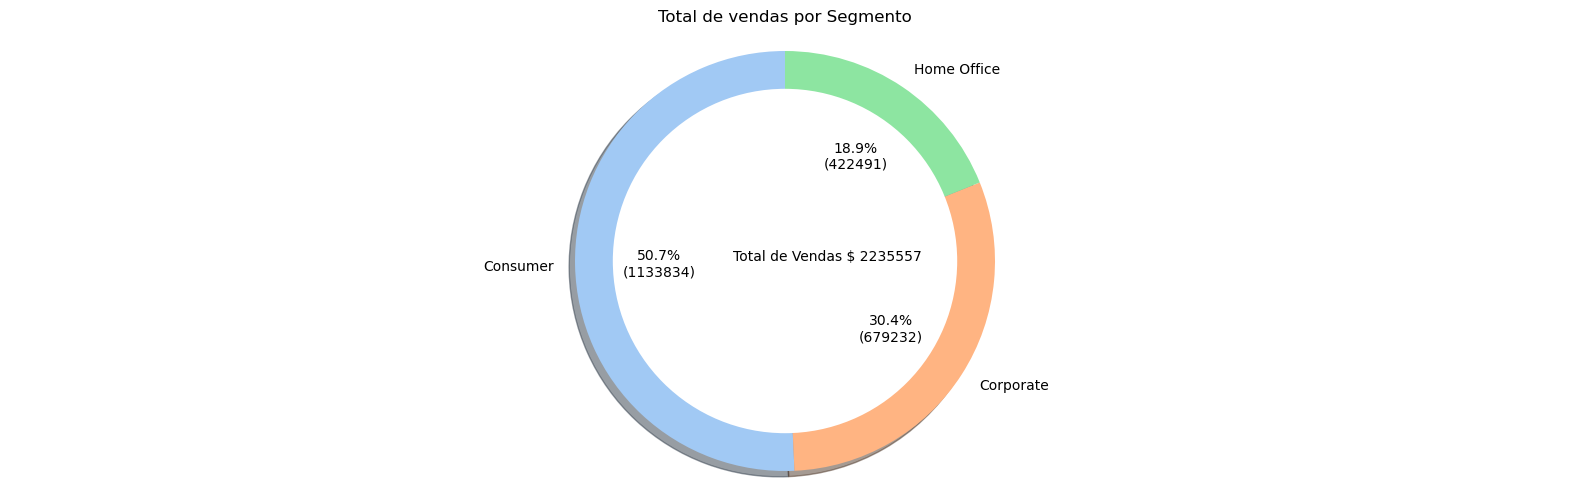

In [77]:
#Plot
#Tamanho da figura
plt.figure(figsize=(20, 6))
#grafico de pizza
plt.pie(df_dsa_p5['Valor_Venda'],
        labels= df_dsa_p5['Segmento'],
        autopct=autopct_format(df_dsa_p5['Valor_Venda']),
        startangle=90,
        shadow=True,
        colors=sns.color_palette('pastel')[0:5])
plt.axis('equal') #para o grafico ficar redondo

#Limpa o circulo centarl
centre_circule = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circule)

#labels e anotações
plt.annotate(text= 'Total de Vendas' + ' $ ' + str(int(sum(df_dsa_p5['Valor_Venda']))), xy=(-0.25, 0))
plt.title('Total de vendas por Segmento')
plt.show()


Pergunta de Negocio Numero 6
Qual Total de Vendas Por Segmento Por Ano

In [ ]:
#Cnvertemos a coluna de data para o tipo datetime para obter o formato correto
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst=True) #dayfirts estamos a dizer que na formato dd/mm/aaaa o dia vem primeiro

In [ ]:
df_dsa.dtypes #verificando o tipo de dado

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [82]:
#Etraimos o ano criando uma nova coluna
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year

In [83]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [84]:
#Total de vendas por segmento e por ano
df_dsa_p6 = df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

In [88]:
df_dsa_p6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64